# Analysis of Sales Data Using Machine Learning in Python

Using machine learning to analyze and predict the market

CMSE-202 Samson H, Benjamin W, Kieran P, Garrett A

<img src="https://cdn.warc.com/fulltext/ADMAP/images/120605f01.jpg" width=500px>


## What do we want to look into?

1. Does discount have an effect on quantity? 


2. How do sales change with the time of the year and time of the day? 


3. How do these factors change between our favorite products? 

## Looking at the data

This dataset, `sales.csv`, was found on Kaggle. It contains entries of sales in a grocery market. While we wanted to be able to work with data from a real superstore, anything we real we found cost money. That being said, this dataset is composed of hypothetical entries, but can still help provide real-world insights. Below, we will do some further exploration and cleaning to understand the data we are working with. Unfortunately, since we were not able to upload `sales.csv` to our git repository, than we will do some of our exploration and looking into the data with a smaller subset, `super_sample_data.csv`, instead.

In [1]:
# Get some imports out of the way
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import time

In [2]:
super_sales = pd.read_csv("super_sample_data.csv")

In [3]:
print(len(super_sales))

2999


The original dataset has over 6 million entries, so we will work with this smaller dataset that has about 3000 entries.

In [4]:
super_sales.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",38:25.4,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",03:31.1,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",31:56.9,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",43:55.4,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",37:03.9,4BGS0Z5OMAZ8NDAFHHP3


In [5]:
super_sales = super_sales.fillna(0) # Replaces Nan's in discount column with 0's

In our dataset we have 9 columns:

`SalesID` - The number of the individual sale

`SalesPersonID` - The number in this column is linked to the salesperson, which can be utilized in a second dataset (`employes`) that contains name, gender, and hire date among other details

`CustomerID` - Each number is linked to a specific customer, whose information can be found in in another dataset (`customers`) which includes name and address

`ProductID` - Each number is linked to a certain product, where the information of the product can be extracted using the dataset `products`, which includes price and the name of the product

`Quantity` - Total number of the product sold to that customer in the transaction

`Discount` - A fractional discount the customer was given towards that purchase

`TotalPrice` - `ProductID`'s price * `Quantity`

`SalesDate` - Includes the date and time of the sale

`TransactionNumber` - Randomized code to represent the transaction number

Some of these columns contain data we will not be utilizing, such as `TransactionNumber` and `SalesPersonID`. On the other hand, much of this data will be very useful to us, so we may want to learn more about the specific categories of products we are working with.

In [6]:
categories = pd.read_csv("data/categories.csv", sep = ';')
products = pd.read_csv("data/products.csv", sep = ';')


First we will take a closer look at the products we are working with in this dataset, specfically at the distribution and variety of these products.


In [7]:
products.head()

,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays
0,1,Flour - Whole Wheat,"74,2988",3,Medium,2018-02-16 08:21:49.190,Durable,NaN,NaN
1,2,Cookie Chocolate Chip With,"91,2329",3,Medium,2017-02-12 11:39:10.970,NaN,NaN,NaN
2,3,Onions - Cippolini,"9,1379",9,Medium,2018-03-15 08:11:51.560,Weak,False,111.0
3,4,"Sauce - Gravy, Au Jus, Mix","54,3055",9,Medium,2017-07-16 00:46:28.880,Durable,NaN,NaN
4,5,Artichokes - Jerusalem,"65,4771",2,Low,2017-08-16 14:13:35.430,Durable,True,27.0


There is a lot of information that does not make sense for us to use here, so we will do a little work to trim and combine our datasets to get something more useful.

In [8]:
products = pd.merge(products, categories, on = ['CategoryID','CategoryID'])
products = products.drop(columns = ['CategoryID','ModifyDate','IsAllergic', 'VitalityDays','Class', 'Resistant'])

In [9]:
products.head()

,ProductID,ProductName,Price,CategoryName
0,1,Flour - Whole Wheat,"74,2988",Cereals
1,2,Cookie Chocolate Chip With,"91,2329",Cereals
2,19,Tea - Earl Grey,"22,5614",Cereals
3,20,Chocolate - Feathers,"85,9011",Cereals
4,24,"Beer - Alexander Kieths, Pale Ale","89,037",Cereals


Each product has a lot of extra information that we will not need to use. We are mostly concerned here with the `CategoryID`, `Price`, and `ProductName`. Lets first take a look at the kinds of products we have. The next block of code is commented out because it takes about an hour to run (given our data containts over 6 millions entries), but we have placed the plot that it produces below the code. 

In [10]:
### Gathering the sizes for the categories
# k = 0
# cat_dic = {}
# for i in range(len(sales)):
#     prod_id = sales.iloc[i,3]
#     df = products[products['ProductID'] == prod_id]
#     cat_id = df.iloc[0,3]
#     if cat_id in cat_dic:
#         cat_dic[cat_id] += 1
#     else:
#         cat_dic[cat_id] = 1
#     k += 1
#     if k == 100000:
#         print(i, " at {}".format(time.time()))
#         k=0


# cat_list = []
# for i in range(len(categories)):
#     cat_list.append(categories.iloc[i,1])

# sizes = list(cat_dic.values())

# ### Plotting the pie chart

# labels = cat_list
# colors = ['blue', 'orange', 'cyan', 'gold', 'gray', 'brown', 'purple', 'red', 'green', 'pink', 'yellow']
# # Plot
# plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%')
 
# plt.axis('equal')
# plt.title("Distribution of grocery sales \n")
# plt.savefig("category_pie.png")

<img src="category_pie.png">

As we can see by the pie chart, there is a large variety in terms of what is being sold in this dataset, where our most popular buy is `Confections` and our least popular category is `Shell fish`.

In [11]:
# Commented out but plot placed below for reference.

# plt.hist(sales['Discount'])
# plt.xlabel("Discount")
# plt.ylabel("Number of sales")
# plt.title("Distribution of Discounts")
# plt.savefig("discounts.png")

<img src="discounts.png">

We see here that 80% of the sales have no discount, 10% have a 10% discount, 10% have a 20% discount.

# Crab Legs

Next we're going to look at just one specific product, crab legs. Looking at just one item will limit how much data we have to something more manageable, like 15,000 entries.

In [12]:
crab_legs = pd.read_csv("data/crabs2.csv")

In [13]:
crab_legs.head()

,Unnamed: 0,ProductID,Quantity,Discount,SalesDate,SalesTime
0,32,291,11,0.0,56,511
1,133,291,9,0.1,92,1351
2,824,291,25,0.0,1,744
3,1217,291,11,0.0,120,722
4,1552,291,17,0.0,10,955


This dataset has been transformed into a different format, where things like `ProductID`, `Quantity`, and `Discount` are all the same as before. We have two new columns that have been added to replace the `SalesDate` column before. We took the sales date from the original dataset `sales` and converted into two separate columns so we could look at the relationships between time and day of the sale with quantity of the sale.

In [14]:
headers = crab_legs.columns.to_list()

In [15]:
print(headers)

['Unnamed: 0', 'ProductID', 'Quantity', 'Discount', 'SalesDate', 'SalesTime']


In [16]:
crab_legs = crab_legs.drop(columns = headers[0])

In [17]:
crab_legs.head() # Now the dataset is where we wnat it to be.

,ProductID,Quantity,Discount,SalesDate,SalesTime
0,291,11,0.0,56,511
1,291,9,0.1,92,1351
2,291,25,0.0,1,744
3,291,11,0.0,120,722
4,291,17,0.0,10,955


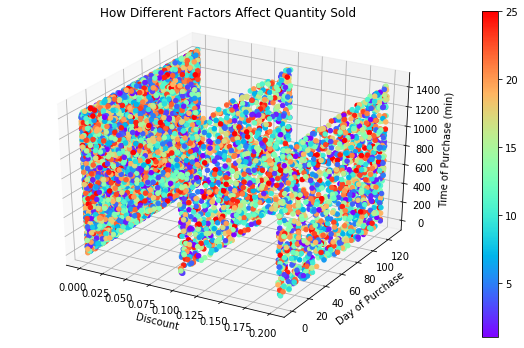

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection='3d')

disc = list(crab_legs['Discount'])
days = list(crab_legs['SalesDate'])
time = list(crab_legs['SalesTime'])
sz = list(crab_legs['Quantity'])

cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=min(sz), vmax=max(sz))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm)

ax.scatter(disc, days, time, alpha = 1, color = cmap(norm(sz)))
ax.set_xlabel('Discount')
ax.set_ylabel('Day of Purchase ')
ax.set_zlabel('Time of Purchase (min)')
ax.set_title("How Different Factors Affect Quantity Sold \n")
plt.savefig("3d quantity crabs.png")

As you can see, there is a lot going on in this plot. On the X-axis, we have discount, which the fact that there are only 3 discounts is helpful in dividing up the plot and making it easier to read. On the Y-Axis, we have day of purchase (ranging from 0 to ~130), which corresponds to the day of the year. On the Z-Axis we have time of purchase, in minutes, to describe how many minutes into the day the purchase was made. And the color of each dot is representative of the quantity of that item sold. We were hoping to see in this graph a cluster of red in the discounts to show that discounting an item is effective, or that red clusters would go up at certain peaks of the day. Given we did not get this result, this is more reason to think the data is likely hypothetical.

# Machine Learning with the data

For this project, we have decided that the best way to handle our data set would be to apply Principal Components Analysis (PCA). The objective of PCA is to find the most important factors when it comes to determining the desired output by reducing the number of dimensions in your problem. In our particular case, we will be using it to predict quantity of an item sold based on factors such as price, discount, and time of year. PCA will help us determine the most important factor(s).

In [ ]:
# list of tools needed
import sklearn
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [ ]:
#import data and split into test/train sets
sales = pd.read_csv("crabs_FINAL.csv", sep=",")

#get the lables and data set
y = sales['Quantity']
X = (sales.loc[:, sales.columns != 'Quantity'])

#split data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,shuffle=True) 

#scale data
normaldata=StandardScaler().fit_transform(sales)

In [ ]:
#run pca
decomposed=PCA(n_components=4) 

#fit a model
decomposed.fit(normaldata)

print("The explained varience PCA: ",decomposed.explained_variance_ratio_)

#make some plots
fig, ax = plt.subplots(6)
fig.figsize=(30,30)
change = decomposed.fit_transform(normaldata)
#plt.plot(change[:,0],change[:,2],'.')
#plt.plot(change[:,1],change[:,2],".")
print(change)
plt.figure(figsize=(50,50))
ax[0].hexbin(change[:,0],change[:,1],gridsize=(20,20))
ax[1].hexbin(change[:,0],change[:,2],gridsize=(20,20))
ax[2].hexbin(change[:,0],change[:,3],gridsize=(20,20))
ax[3].hexbin(change[:,1],change[:,2],gridsize=(20,20))
ax[4].hexbin(change[:,1],change[:,3],gridsize=(20,20))
ax[5].hexbin(change[:,2],change[:,3],gridsize=(20,20))
ax[0].title.set_text('First principle vs Second')
ax[1].title.set_text('First principle vs Third')
ax[2].title.set_text('First vs Fourth')
ax[3].title.set_text('Second vs Third')
ax[4].title.set_text('Second vs Fourth')
ax[5].title.set_text('Third vs Fourth')
fig.set_figheight(30)
fig.set_figwidth(10)


This shows us that the pretty much the same thing the 3d graph does, except it shows us the distribution of the data, atleast in the date and time dimensions were generated from a bivariate normal distribiution 

Random forest is a machine learning algorithm that builds decision trees that try to predict our quantity variable. The random forest method refers to the fact that we are making a hundred trees and returning a compost -or best- tree. This is how we get our model. 

In [23]:
# try Random Forest
clf = RandomForestClassifier(n_estimators=100, max_depth=500, random_state=0)
clf.fit(X_train, y_train)
pred_labels = clf.predict(X_test)

print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           1       0.02      0.01      0.02       149
           2       0.05      0.05      0.05       153
           3       0.03      0.03      0.03       144
           4       0.03      0.03      0.03       160
           5       0.03      0.03      0.03       133
           6       0.05      0.04      0.05       159
           7       0.03      0.03      0.03       146
           8       0.03      0.03      0.03       143
           9       0.03      0.03      0.03       138
          10       0.02      0.02      0.02       136
          11       0.04      0.04      0.04       140
          12       0.06      0.05      0.05       166
          13       0.06      0.07      0.07       135
          14       0.07      0.06      0.06       163
          15       0.05      0.05      0.05       155
          16       0.06      0.06      0.06       146
          17       0.02      0.03      0.03       149
          18       0.06    

The results are really bad. Our precision in our testing was poor (never above 0.1). This suggest that there is no pattern in the data, and rather, since it is so bad, indicates that the data is perfectly random. From the results, we can actually see that the number of results per quantity (meaning 1-25), there are roughly the same number of data transactions for each. This is intresting because you would likely see more tranactions of a smaller quantity rather than a large one. Since they were all close to the same, this kinda 